**Autor** : Rafaela Ramos Sarmento

**e-mail**: rafaelaramos.datasci@gmail.com

#  <a name="resumo"> RESUMO </a>
[Voltar ao índice](#indice)

Este notebook tem o objetivo de realizar uma analise de risco fictícia como solução de um dos exercícios da trilha de Big Data Science oferecido pela SEMANTIX.

#  <a name="indice">  Índice </a>

* [Resumo](#resumo)
* [Índice](#indice)
* [Problema a ser analisado](#secao_0)
* [Análise Descritiva Univariada](#secao_1)
* [Análise Descritiva Bivariada](#secao_2)
* [Transformando Variáveis Categóricas em Binárias](#secao_3)
* [Conclusão](#conclusao)

#  <a name="secao_0"> Problema a ser analisado </a>
[Voltar ao índice](#indice)

Um grande banco tem o objetivo de desenvolver um modelo para identificar maior probabilidade de default. Sua tarefa será realizar uma análise descritiva e tratamento dos dados para entender o perfil dos clientes e quais fatores podem influenciar no risco de crédito.

Problema: probabilidade de default (true= pessoa que não vai pagar o emprestimo; false = pessoa que vai pagar o emprestimo)

In [262]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [263]:
#importando bibliotecas necessárias para a analise
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
import missingno as msno

In [264]:
#lendo o dataframe
df = pd.read_csv("risco_credito.csv")
df.head()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,signo,genero,perfil_facebook,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,virg,f,True,0.0
1,False,0.23,10046.51,36.0,NaN,46016.31,sagi,f,False,0.0
2,False,0.30,21228.25,60.0,NaN,48025.47,libr,m,True,0.0
3,False,0.15,23032.33,36.0,NaN,46011.12,NaN,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,libr,m,NaN,0.0


In [265]:
df.tail()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,signo,genero,perfil_facebook,n_emprestimos_inadiplentes
64587,False,0.33,7230.74,36.0,NaN,57012.14,libr,m,True,0.0
64588,False,0.20,9764.01,36.0,15478.0,76032.77,leo,m,False,0.0
64589,False,0.53,35022.28,60.0,18658.0,100028.45,NaN,f,False,0.0
64590,False,0.43,20015.96,36.0,NaN,109561.85,arie,m,False,0.0
64591,False,0.35,16327.45,36.0,11904.0,41023.92,NaN,m,True,0.0


In [266]:
#eliminando colunas desnecessárias para a analise
df = df.drop(columns=['signo'])
df.head(10)

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,genero,perfil_facebook,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,f,True,0.0
1,False,0.23,10046.51,36.0,NaN,46016.31,f,False,0.0
2,False,0.30,21228.25,60.0,NaN,48025.47,m,True,0.0
3,False,0.15,23032.33,36.0,NaN,46011.12,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,m,NaN,0.0
5,False,0.22,8007.11,36.0,NaN,43008.57,f,False,0.0
6,False,0.42,10072.16,36.0,0.0,39335.52,m,False,0.0
7,False,0.42,16016.97,60.0,102018.0,98772.00,m,True,0.0
8,False,0.36,11517.24,60.0,0.0,62014.40,f,False,0.0
9,False,0.24,11539.08,36.0,82310.0,85022.96,f,True,0.0


In [267]:
#criando funcao para ter informacoes sobre os dados
def show_info(data) :
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())
  

In [268]:
show_info(df)

DATASET SHAPE:  (64592, 9) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64592 entries, 0 to 64591
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   default                     59966 non-null  object 
 1   t_risco                     63807 non-null  float64
 2   valor_emprestimo            63807 non-null  float64
 3   prazo_pagamento             63807 non-null  float64
 4   limite_credito              44839 non-null  float64
 5   renda                       63807 non-null  float64
 6   genero                      57406 non-null  object 
 7   perfil_facebook             58185 non-null  object 
 8   n_emprestimos_inadiplentes  63789 non-null  float64
dtypes: float64(6), object(3)
memory usage: 4.4+ MB
None

 --------------------------------------------------
NUMBER OF UNIQUE VALUES PER FEATURE: 

default         

<AxesSubplot:>

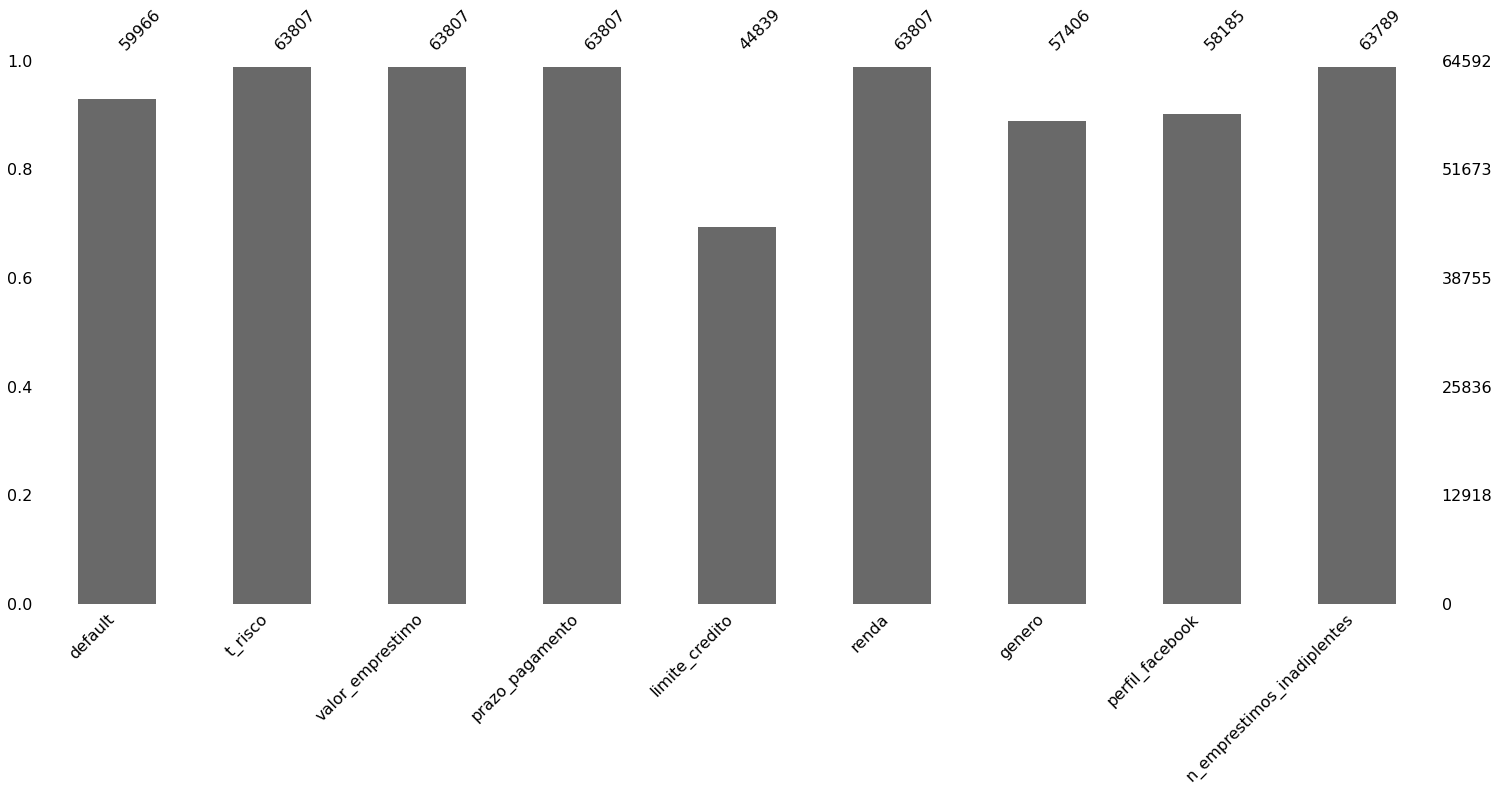

In [269]:
msno.bar(df)

In [270]:
df = df.dropna(subset=["default"])

#  <a name="secao_1"> Análise descritiva Univariada </a>
[Voltar ao índice](#indice)

Vamos calcular algumas propriedades estatisticas dessa base de dados, e verificar, se a média é um valor ideal ou não para substituit nas entradas nulas. 

Lambrando que o padrão do valor de C.V é:
- CV < 15% : Bom, pouca dispersão;
- 15% < CV < 30%: Médio, dispersão razoável
- CV > 30%: Ruim, dispersão alta.

In [271]:
numerical = ['t_risco','valor_emprestimo','prazo_pagamento','limite_credito', 'n_emprestimos_inadiplentes']

In [272]:
#df["default"] = df["default"].map({ 0 : 'False', 1 : 'True'})

In [273]:
#calculo mediana
mediana_t_risco = sts.median(df['t_risco'])
mediana_valor_emprestimo = sts.median(df['valor_emprestimo'])
mediana_prazo_pagamento = sts.median(df['prazo_pagamento'])
mediana_limite_credito = sts.median(df['limite_credito'])
mediana_n_emprestimos_inadiplentes = sts.median(df['n_emprestimos_inadiplentes'])

print('mediana_t_risco: \n',round(mediana_t_risco,2))
print('mediana_valor_emprestimo: \n',round(mediana_valor_emprestimo,2))
print('mediana_prazo_pagamento: \n',round(mediana_prazo_pagamento,2))
print('mediana_limite_credito: \n',round(mediana_limite_credito,2))
print('mediana_n_emprestimos_inadiplentes: \n',round(mediana_n_emprestimos_inadiplentes,2))

mediana_t_risco: 
 0.29
mediana_valor_emprestimo: 
 12012.4
mediana_prazo_pagamento: 
 36.0
mediana_limite_credito: 
 1000.0
mediana_n_emprestimos_inadiplentes: 
 0.0


In [274]:
df['t_risco'].describe().round(2).T

count    59966.00
mean         0.29
std          0.10
min          0.00
25%          0.22
50%          0.29
75%          0.36
max          0.90
Name: t_risco, dtype: float64

In [275]:
#calculando o Coeficiente de Variação
CV_t_risco = np.std(df['t_risco'])/np.mean(df['t_risco'])
CV_valor_emprestimo = np.std(df['valor_emprestimo'])/np.mean(df['valor_emprestimo'])
CV_prazo_pagamento = np.std(df['prazo_pagamento'])/np.mean(df['prazo_pagamento'])
CV_limite_credito = np.std(df['limite_credito'])/np.mean(df['limite_credito'])
CV_n_emprestimos_inadiplentes = np.std(df['n_emprestimos_inadiplentes'])/np.mean(df['n_emprestimos_inadiplentes'])

print('CV_t_risco: \n',round(CV_t_risco,2))
print('CV_valor_emprestimo: \n',round(CV_valor_emprestimo,2))
print('CV_prazo_pagamento: \n',round(CV_prazo_pagamento,2))
print('CV_limite_credito: \n',round(CV_limite_credito,2))
print('CV_n_emprestimos_inadiplentes: \n',round(CV_n_emprestimos_inadiplentes,2))

CV_t_risco: 
 0.34
CV_valor_emprestimo: 
 0.59
CV_prazo_pagamento: 
 0.23
CV_limite_credito: 
 1.08
CV_n_emprestimos_inadiplentes: 
 16.93


observamos que:

CV_t_risco: 0.34

CV_valor_emprestimo: 0.59

CV_prazo_pagamento: 0.25

CV_limite_credito: 1.08

CV_n_emprestimos_inadiplentes: 16.93
 
logo, 't_risco', 'valor_emprestimo', 'limite_credito' e 'n_emprestimos_inadiplentes' possuem alta dispersão, logo não vamos usar a média para substituir os valores NaN. Vamos usar a mediana.   Para prazo_pagamento vamos usar a média.

In [276]:
#preenche onde esta NaN pela mediana ou media.
df['t_risco'].fillna(np.median(df['t_risco']), inplace=True)
df['valor_emprestimo'].fillna(np.median(df['valor_emprestimo']), inplace=True)
df['limite_credito'].fillna(sts.mode(df['limite_credito']), inplace=True)
df['n_emprestimos_inadiplentes'].fillna(np.median(df['n_emprestimos_inadiplentes']), inplace=True)
df['prazo_pagamento'].fillna(np.mean(df['prazo_pagamento']), inplace=True)

In [277]:
df.head(10)

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,genero,perfil_facebook,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,f,True,0.0
1,False,0.23,10046.51,36.0,0.0,46016.31,f,False,0.0
2,False,0.30,21228.25,60.0,0.0,48025.47,m,True,0.0
3,False,0.15,23032.33,36.0,0.0,46011.12,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,m,NaN,0.0
5,False,0.22,8007.11,36.0,0.0,43008.57,f,False,0.0
6,False,0.42,10072.16,36.0,0.0,39335.52,m,False,0.0
7,False,0.42,16016.97,60.0,102018.0,98772.00,m,True,0.0
8,False,0.36,11517.24,60.0,0.0,62014.40,f,False,0.0
9,False,0.24,11539.08,36.0,82310.0,85022.96,f,True,0.0


##  <a name="secao_1"> Análise Descritiva Univariada </a>
[Voltar ao índice](#indice)
## Informações sobre a base de dados

- 67,57% dos clientes são homens
- 32,43% dos clientes são mulheres

- prazo para pagar os emprestimos é binário com  80,5% dos clientes tendo 36 meses e 19,5% tendo 60 meses
- O maior valor de emprestimo é de 35059,60 e o menor é de 527,07
- A maior renda entre os clientes é de 5000027.83 e a menor de 4821.18	
- A taxa de risco tem um pico em torno de 0,3


In [278]:
#vamos obter as propriedades estatisticas de cada coluna
df.describe().round(2)

,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,n_emprestimos_inadiplentes
count,59966.00,59966.00,59966.00,59966.00,59966.00,59948.00
mean,0.29,13411.81,40.67,23416.41,71325.78,0.00
std,0.10,7957.40,9.50,34341.15,51691.43,0.08
min,0.00,527.07,36.00,0.00,4821.18,0.00
25%,0.22,7225.99,36.00,0.00,44027.86,0.00
50%,0.29,12012.40,36.00,11138.50,60047.26,0.00
75%,0.36,18036.64,36.00,35125.00,85039.61,0.00
max,0.90,35059.60,60.00,613117.00,5000027.83,5.00


In [279]:
df['genero'].value_counts(normalize=True)

m    0.675742
f    0.324258
Name: genero, dtype: float64

In [280]:
# para as variaveis qualitativas vamos substituir pela moda.
df['genero'] = df['genero'].fillna(df['genero'].mode()[0])
df['perfil_facebook'] = df['perfil_facebook'].fillna(df['perfil_facebook'].mode()[0])

In [281]:
df.isnull().sum()

default                        0
t_risco                        0
valor_emprestimo               0
prazo_pagamento                0
limite_credito                 0
renda                          0
genero                         0
perfil_facebook                0
n_emprestimos_inadiplentes    18
dtype: int64

In [282]:
df['prazo_pagamento'].value_counts(normalize=True)

36.0    0.805223
60.0    0.194777
Name: prazo_pagamento, dtype: float64

In [283]:
df['n_emprestimos_inadiplentes'].value_counts(normalize=True)

0.0    0.995963
1.0    0.003520
2.0    0.000434
3.0    0.000067
5.0    0.000017
Name: n_emprestimos_inadiplentes, dtype: float64

### Análise Exploratória

Vamos agora graficar nossas variaveis e entender o comportamento delas.

In [284]:
va_qualitativa = ['object', 'bool'] 
qualitativas = list(df.select_dtypes(include=va_qualitativa).columns)
qualitativas

['default', 'genero', 'perfil_facebook']

In [285]:
df_qualitativas = df[qualitativas] 
df_qualitativas.head()

,default,genero,perfil_facebook
0,False,f,True
1,False,f,False
2,False,m,True
3,False,m,False
4,False,m,False


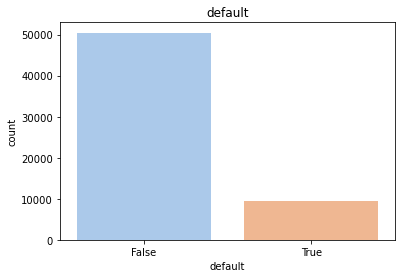

In [287]:
#sns.countplot(df['genero'], palette='magma').set_title('genero')
sns.countplot(x=df_qualitativas['default'], palette = 'pastel').set_title('default')
plt.show()

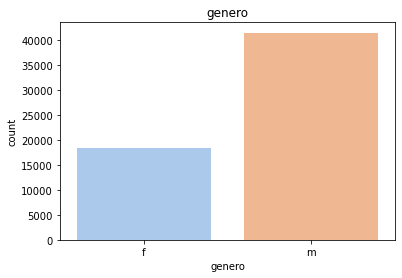

In [288]:
sns.countplot(x=df_qualitativas['genero'], palette = 'pastel').set_title('genero')
plt.show()

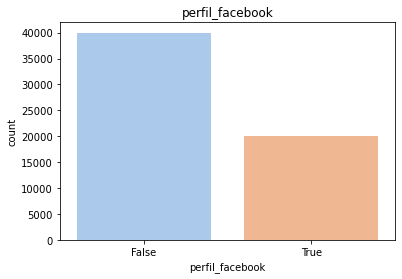

In [289]:
sns.countplot(x=df_qualitativas['perfil_facebook'], palette = 'pastel').set_title('perfil_facebook')
plt.show()

In [290]:
#fazendo o mesmo para variaveis quantitativas:

va_quantitativa = ['float64'] 
quantitativas = list(df.select_dtypes(include=va_quantitativa).columns)
quantitativas

['t_risco',
 'valor_emprestimo',
 'prazo_pagamento',
 'limite_credito',
 'renda',
 'n_emprestimos_inadiplentes']

In [291]:
df_quantitativas = df[quantitativas] 
df_quantitativas.head()

,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,n_emprestimos_inadiplentes
0,0.43,20024.31,60.0,62386.0,59869.05,0.0
1,0.23,10046.51,36.0,0.0,46016.31,0.0
2,0.30,21228.25,60.0,0.0,48025.47,0.0
3,0.15,23032.33,36.0,0.0,46011.12,0.0
4,0.08,24026.29,36.0,32366.0,90026.17,0.0


t_risco


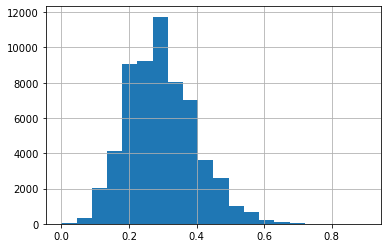

valor_emprestimo


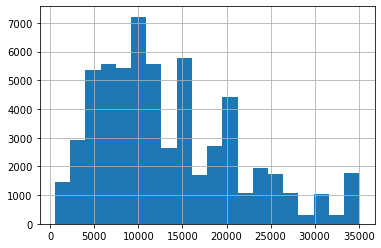

prazo_pagamento


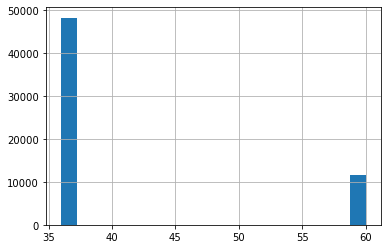

limite_credito


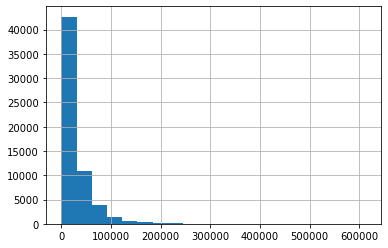

renda


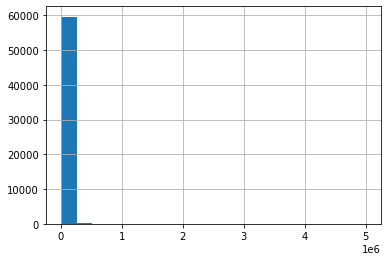

n_emprestimos_inadiplentes


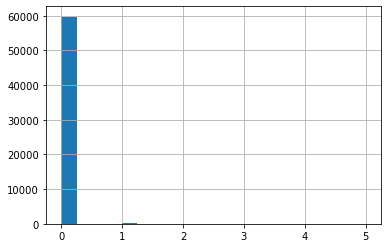

In [292]:
for va_quantitativa in df_quantitativas : 
    print(va_quantitativa) 
    df_quantitativas[va_quantitativa].hist(bins=20) 
    plt.show()

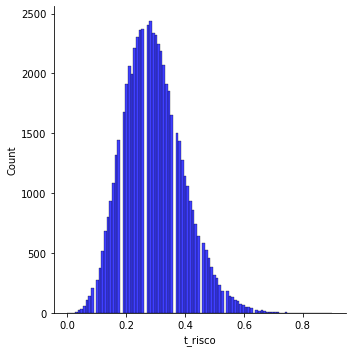

In [293]:
#avaliando que tipo de distribuicao nos temos para t_risco
sns.displot(x=df['t_risco'], bins=100, rug=False, color='blue')

##  <a name="secao_2"> Análise Descritiva Bivariada </a>
[Voltar ao índice](#indice) 

Vamos agora observar as relações entre as variáveis.

<strong>Variaveis qualitativas:</strong>

    - Genero e ter ou não perfil no facebook parece não afetar o risco de credito
    
<strong> Variaveis quantitativas: </strong>
          ['t_risco','valor_emprestimo','prazo_pagamento','limite_credito','renda','n_emprestimos_inadiplentes']

<AxesSubplot:xlabel='perfil_facebook', ylabel='count'>

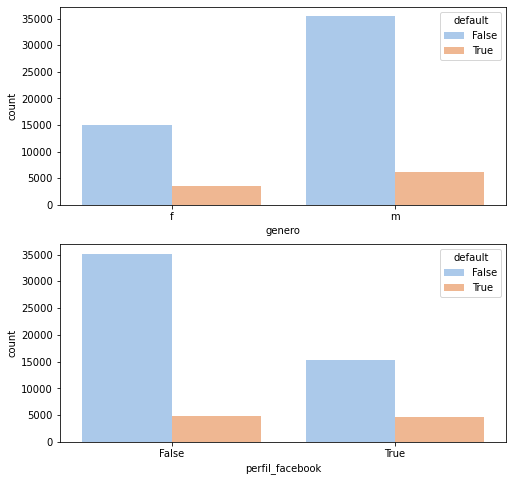

In [295]:
fig, ax = plt.subplots(2,1, figsize=(8, 8))
#plt.tight_layout(1)

sns.countplot(x=df['genero'], hue=df.default, ax=ax[0], palette='pastel')
sns.countplot(x=df['perfil_facebook'], hue=df.default, ax=ax[1], palette='pastel')

t_risco


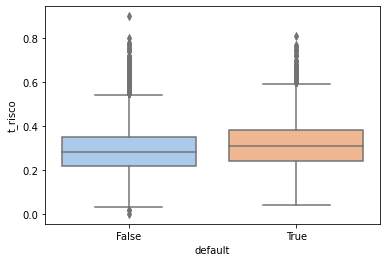

valor_emprestimo


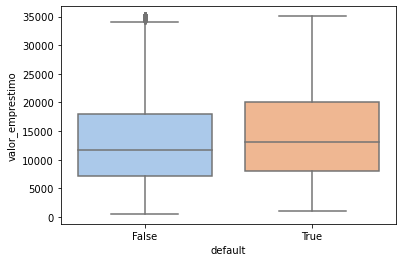

prazo_pagamento


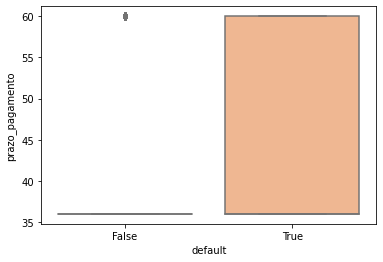

limite_credito


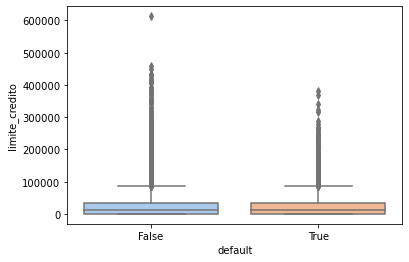

renda


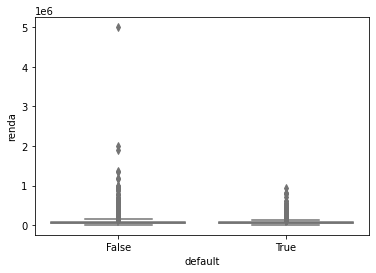

n_emprestimos_inadiplentes


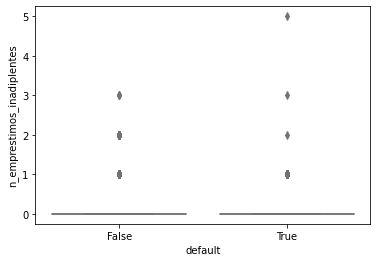

In [296]:
for va_quantitativas in df_quantitativas :
    print(va_quantitativas) 
    sns.boxplot(y=df_quantitativas[va_quantitativas], x='default', data=df, palette='pastel') 
    plt.show()

<AxesSubplot:title={'center':'Correlação entre as features'}>

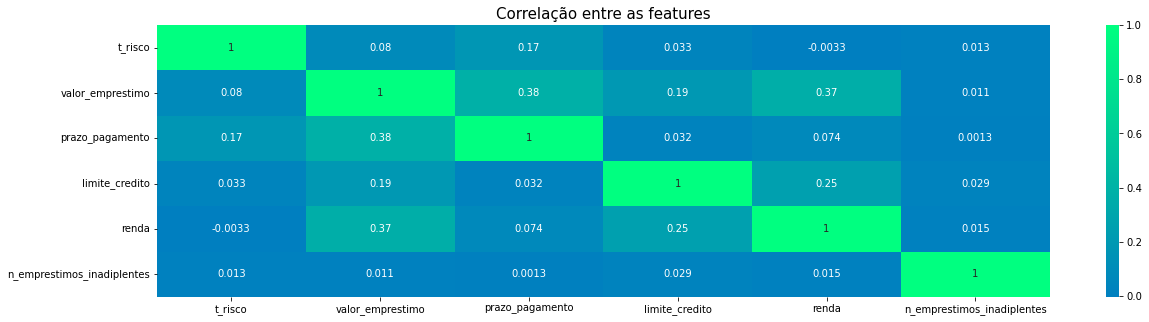

In [297]:
#calculo da matriz de correlação entre as variáveis quantitativas do problema
plt.figure(figsize=(20,5)) 
plt.title('Correlação entre as features', size = 15) 
sns.heatmap(df_quantitativas.corr(), cmap='winter', center = 0, annot=True)

<Figure size 1080x504 with 0 Axes>

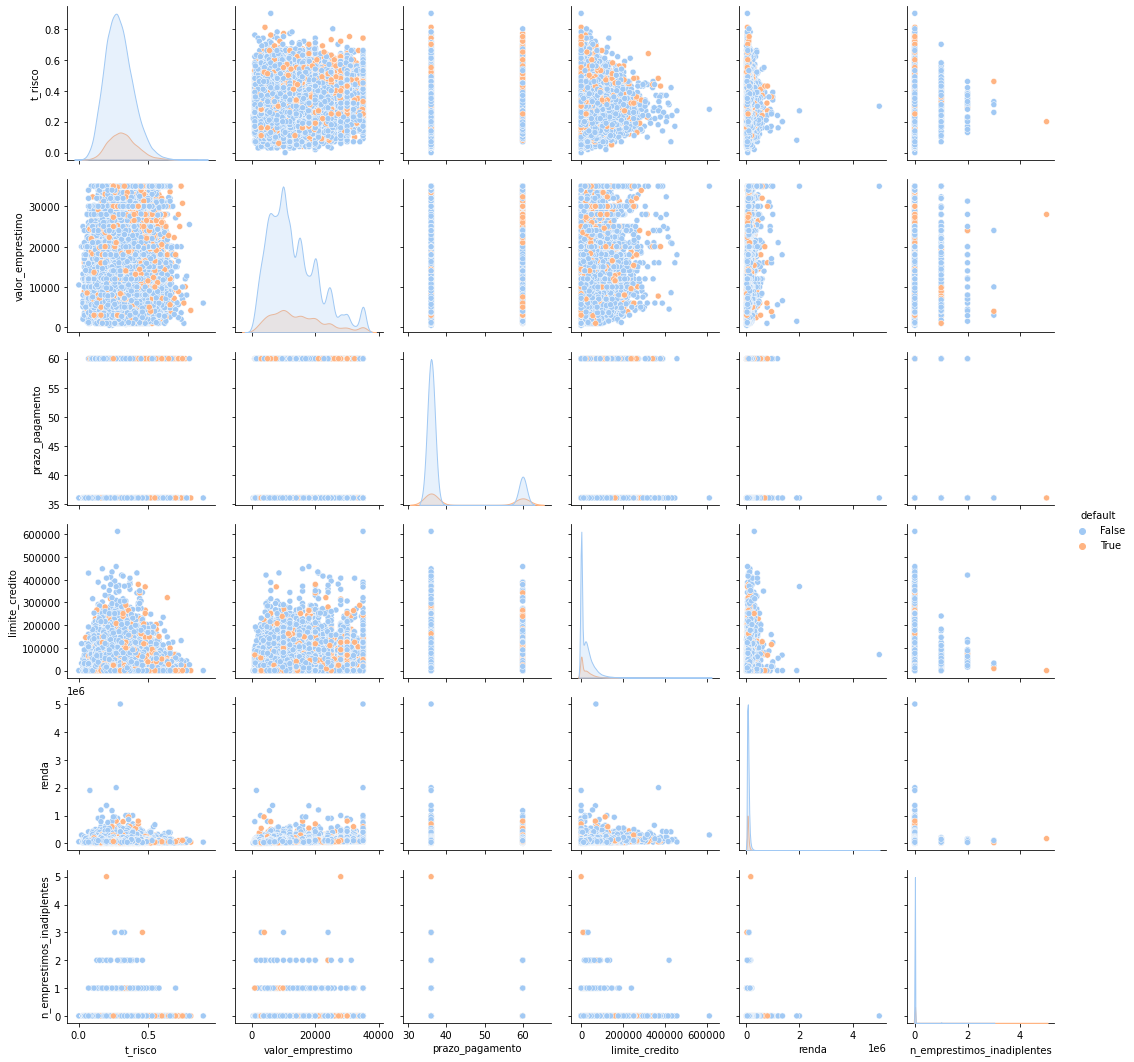

In [298]:
#coluna 'perfil_facebook precisa ser removida para não causar erro no paiplot, pois ela é uma varia
#vel do tipo bool
plt.figure(figsize=(15,7))
sns.pairplot(data=df.drop(columns=['perfil_facebook']), hue='default', palette = 'pastel')

observamos que não há nenhum comportamento interessante ou que apresente alguma relação entre as variaveis. Todos os comportamentos são aleatórios.

##  <a name="secao_3"> Transformando Variáveis Categóricas em Binárias </a>
[Voltar ao índice](#indice)  

Esta seção é dedicada apenas a transformação das variáveis categóricas em binárias, e também vamos transformar o 'prazo_pagamento' em binário.

In [299]:
df = pd.get_dummies(df, columns=['prazo_pagamento', 'genero', 'perfil_facebook', 'default'], drop_first = True)

In [300]:
df.head()

,t_risco,valor_emprestimo,limite_credito,renda,n_emprestimos_inadiplentes,prazo_pagamento_60.0,genero_m,perfil_facebook_True,default_True
0,0.43,20024.31,62386.0,59869.05,0.0,1,0,1,0
1,0.23,10046.51,0.0,46016.31,0.0,0,0,0,0
2,0.30,21228.25,0.0,48025.47,0.0,1,1,1,0
3,0.15,23032.33,0.0,46011.12,0.0,0,1,0,0
4,0.08,24026.29,32366.0,90026.17,0.0,0,1,0,0


- default_True: se a pessoa for uma boa pagadora então =(1) se for uma má pagadora então =(0)
- prazo_pagamento_60.0: se a pessoa tem prazo de 60 meses =(1) se for de 36 então =(0)
- genero_m: se for homem =(1) se for mulher =(0)
- perfil_facebook_True : se a pessoa tem perfil no facebook então = (1) se não tem então = (0)

##  <a name="conclusao"> Conclusão </a>
[Voltar ao índice](#indice)  


A partir da análise descritiva desta base de dados foi possível aplicar algumas operações de tratamento de dados. Foi possível também observar que fatores como 'genero' e 'perfil_facebook' não aferam o risco de emprestimo ao cliente. A taxa de risco 't_risco' possui uma distribuição norma, sendo assim simétrica. 

Foi realizado o cálculo da matriz de covariância, no qual pode-se concluir que há pouca dependencia de uma variável com a outra. Neste mesmo seguimento, olhou-se para o gráfico de relação entre as variáveis de forma que foi possível concluir que estas não possuem nenhum padrão em específico, tendo o comportamento aleatório.